<a href="https://colab.research.google.com/github/wangechi-wq/IPWEEK4/blob/main/Copy_of_IP_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Define the Question



Investigate is the total number of blue cars taken is the same during the weekdays.



```

```

# Specifying the Data Analytic Question: PROBLEM STATEMENT

Investigate a claim about the blue cars considering the given autilob dataset.

Null hypothesis:The sum of total number of blue cars taken is NOT the same during weekdays.

Alternative hypothesis: the sum of total number of blue cars taken is the same same during weekdays.

# Defining the Metric for Success


The objectives for this data includes investigating the claim listed above and knowing whether or not the the that the sum of total number of blue cars are NOT the same in most days of the week. this will be done by performing:
1 Univariate Analysis

2 Bivariate Analysis

3 Multivariate Analysis

4 Data visualization such as use of histograms etc

# Recording the Experimental Design

. Defining the research question

. Identifying and dealing with outliers, anomalies, and missing data within the dataset.

. Plot appropriate univariate and bivariate summaries recording our observations.

. Implement the solution by performing hypothesis testing.

. Challenge your solution by providing insights on how you can make improvements.

# Data Exploration

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from scipy import stats
from scipy.stats import norm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [44]:
# importing the dataset
link = 'http://bit.ly/DSCoreAutolibDataset'
data = pd.read_csv(link)
data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# Reviewing the dataset

In [3]:
#reviewing the dataset
data.shape

(16085, 13)

In [4]:
# info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [5]:
# Checking the datatypes
data.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [6]:
# Identifying Null values in the dataset
data.isna().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
# Identify the unique values in the "day type" column
data["day_type"].unique()


array(['weekday', 'weekend'], dtype=object)

In [ ]:
# checking for duplicates
data.duplicated().any()

False

Finding and dealing with outliers

In [7]:
# we are finding the corelation of the  between the sum of blue cars taken and blue cars returned

Q1 = data["BlueCars_taken_sum"].quantile(0.25)
Q3 = data["BlueCars_taken_sum"].quantile(0.75)

IQR = Q3 - Q1 

outliers = ((data.BlueCars_taken_sum < Q1 - 1.5 * IQR) | (data.BlueCars_taken_sum > Q3 + 1.5 * IQR))
outliers.value_counts()

False    13870
True      2215
Name: BlueCars_taken_sum, dtype: int64

The no of Outliers are 2215 for BlueCars_taken_sum

In [8]:
# Calculating the Interquatile Range for BlueCars_returned_sum

Q1 = data["BlueCars_returned_sum"].quantile(0.25)
Q3 = data["BlueCars_returned_sum"].quantile(0.75)

IQR = Q3 - Q1 

outliers = ((data.BlueCars_returned_sum < Q1 - 1.5 * IQR) | (data.BlueCars_returned_sum > Q3 + 1.5 * IQR))
outliers.value_counts()

False    13872
True      2213
Name: BlueCars_returned_sum, dtype: int64

The no of Outliers are 2213 for BlueCars_returned_sum

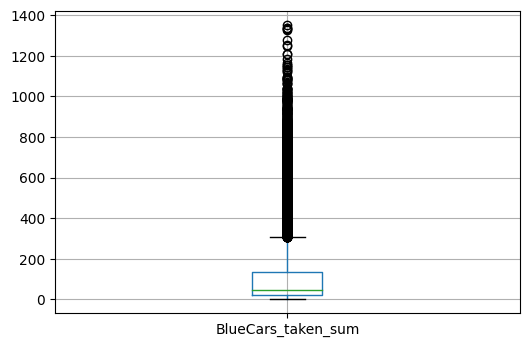

In [9]:
# checking for Outliers
plt.figure(dpi=100)
data.boxplot('BlueCars_taken_sum')


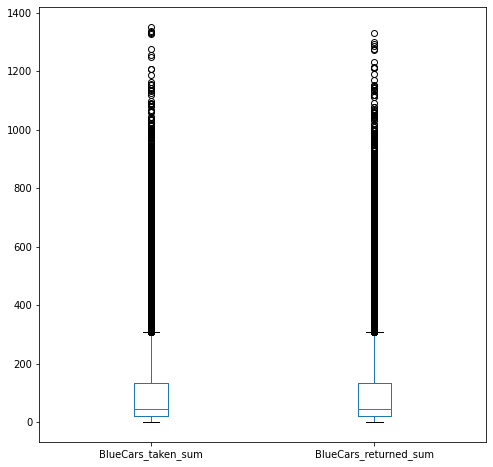

In [ ]:
# Checking for outliers for Blue cars taken and Blue cars returned
data[["BlueCars_taken_sum","BlueCars_returned_sum"]].plot(kind="box",figsize=(8,8))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


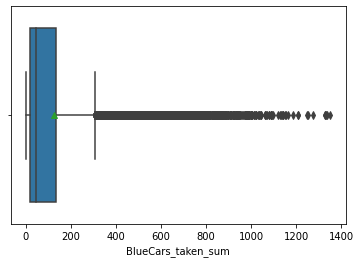

In [ ]:
sns.boxplot(data["BlueCars_taken_sum"], showmeans=True)

In [ ]:
# Identifying columns in the dataset

data.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

# Performing EDA

In [10]:
# Finding the mean


print(data["BlueCars_taken_sum"].mean())
print(data["BlueCars_returned_sum"].mean())

125.92695057506994
125.912713708424


In [11]:
# Finding the median

print(data["BlueCars_taken_sum"].median())
print(data["BlueCars_returned_sum"].median())

46.0
46.0


In [12]:
# Finding the Mode
Numerical_values = data[['date', 'day_type', 'Postal code', 'dayOfWeek']]

for column in Numerical_values: 
  print(data[column].mode())

0     1/24/2018
1     1/25/2018
2     1/27/2018
3     1/28/2018
4     1/29/2018
5      2/1/2018
6     2/23/2018
7     2/28/2018
8      2/3/2018
9      2/4/2018
10     2/5/2018
11    4/25/2018
12    4/26/2018
13    4/27/2018
14    4/28/2018
15    4/29/2018
16    4/30/2018
17     5/1/2018
18     5/2/2018
19    5/20/2018
20    5/22/2018
21    5/23/2018
22    5/24/2018
23    5/25/2018
24    5/26/2018
25    5/27/2018
26    5/28/2018
27    5/29/2018
28     5/3/2018
29    5/30/2018
30    5/31/2018
31     5/4/2018
32     5/5/2018
33     5/6/2018
34     5/8/2018
35     6/1/2018
36    6/10/2018
37    6/11/2018
38    6/12/2018
39     6/2/2018
40     6/3/2018
41     6/4/2018
42     6/5/2018
43     6/6/2018
44     6/7/2018
45     6/8/2018
46     6/9/2018
dtype: object
0    weekday
dtype: object
0     75001
1     75002
2     75003
3     75004
4     75005
      ...  
84    94700
85    94800
86    95100
87    95870
88    95880
Length: 89, dtype: int64
0    0
dtype: int64


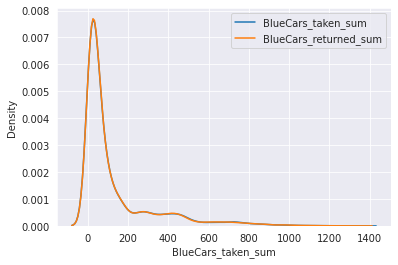

In [ ]:
#  distribution of Blue cars taken and Blue cars returned
sns.set_style('darkgrid')
sns.kdeplot(data.BlueCars_taken_sum)
sns.kdeplot(data.BlueCars_returned_sum)
plt.legend(['BlueCars_taken_sum', 'BlueCars_returned_sum'])
plt.show()

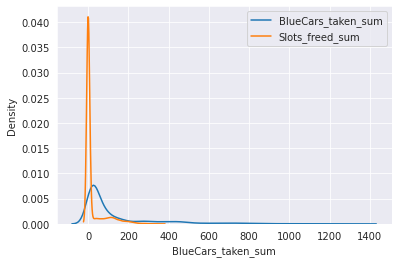

In [ ]:
# This section show the distribution of Blue cars taken and free slots
sns.set_style('darkgrid')
sns.kdeplot(data.BlueCars_taken_sum)
sns.kdeplot(data.Slots_freed_sum)
plt.legend(['BlueCars_taken_sum', 'Slots_freed_sum']);

In [ ]:
data.head(1)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20


# Variability

In [ ]:
data.size

209105

In [ ]:
# Range for the BlueCars_returned_sum column

print(data["BlueCars_returned_sum"].max() - data["BlueCars_returned_sum"].min())

1332


Quantiles

In [13]:
# Finding Quantiles for the BlueCars_returned_sum column and the BlueCars_taken_sum
Blue_return = data["BlueCars_returned_sum"].quantile([0.25,0.5,0.75])

Blue_taken = data["BlueCars_returned_sum"].quantile([0.25,0.5,0.75])

print(Blue_return,Blue_taken)

0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_returned_sum, dtype: float64 0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_returned_sum, dtype: float64


Finding skewness for the high correlation

In [ ]:
print(data["BlueCars_returned_sum"].skew())
print(data["BlueCars_taken_sum"].skew())

2.412084978838923
2.4063548974959086


Finding kurtosis for the high correlation

In [ ]:
print(data["BlueCars_returned_sum"].kurt())
print(data["BlueCars_taken_sum"].kurt())

6.1862880957582345
6.172692305510042


Correlation of Data

In [ ]:
data["BlueCars_returned_sum"].corr(data["Slots_freed_sum"])

0.9482575524525811

In [ ]:
 data["BlueCars_returned_sum"].corr(data["BlueCars_returned_sum"])

1.0

High correlation detected

In [ ]:
desc = data[["BlueCars_returned_sum","BlueCars_taken_sum"]]

desc.describe()

,BlueCars_returned_sum,BlueCars_taken_sum
count,16085.000000,16085.000000
mean,125.912714,125.926951
std,185.501535,185.426579
min,0.000000,0.000000
25%,20.000000,20.000000
50%,46.000000,46.000000
75%,135.000000,135.000000
max,1332.000000,1352.000000


In [14]:
# only the weekday  daytpe will be used 
weekday = data[data.day_type =='weekday']
weekday.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
weekday.size

150072

In [ ]:
#mean for the weekdays
print(weekday["BlueCars_taken_sum"].mean())
print(weekday["BlueCars_returned_sum"].mean())

116.0286729036729
115.63937976437977


In [31]:
# standard dev for the weekday 
weekday.std()

Postal code               7647.995374
n_daily_data_points         36.882140
dayOfWeek                    1.417797
BlueCars_taken_sum         169.626905
BlueCars_returned_sum      168.344751
Utilib_taken_sum             5.379950
Utilib_returned_sum          5.349742
Utilib_14_taken_sum         11.963164
Utilib_14_returned_sum      11.882660
Slots_freed_sum             47.900208
Slots_taken_sum             47.848580
dtype: float64

In [32]:
# variancefor the sample chosen
weekday.var()

Postal code               5.849183e+07
n_daily_data_points       1.360292e+03
dayOfWeek                 2.010149e+00
BlueCars_taken_sum        2.877329e+04
BlueCars_returned_sum     2.833996e+04
Utilib_taken_sum          2.894387e+01
Utilib_returned_sum       2.861974e+01
Utilib_14_taken_sum       1.431173e+02
Utilib_14_returned_sum    1.411976e+02
Slots_freed_sum           2.294430e+03
Slots_taken_sum           2.289487e+03
dtype: float64

In [33]:
# Range for the BlueCars_returned_sum 

print(weekday["BlueCars_taken_sum"].max() - weekday["BlueCars_taken_sum"].min())

1093


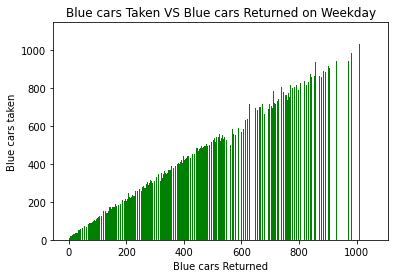

In [34]:
# Defining data
returned = weekday['BlueCars_returned_sum']
taken = weekday['BlueCars_taken_sum']
 

plt.bar(returned, taken, color='green')
plt.xlabel("Blue cars Returned")
plt.ylabel("Blue cars taken")

# Giving a title to our Bar chart
plt.title("Blue cars Taken VS Blue cars Returned on Weekday")

# Displaying our chart
plt.show()

In [35]:
days_of_the_week = weekday.groupby('dayOfWeek').BlueCars_taken_sum.sum()
days_of_the_week

dayOfWeek
0    263893
1    261940
2    261849
3    263207
4    288546
Name: BlueCars_taken_sum, dtype: int64

In [36]:
# Grouping the dataframe based on the Blue cars returned on weekdays
weekday.groupby('dayOfWeek')["BlueCars_returned_sum"].sum()

dayOfWeek
0    264808
1    260470
2    260673
3    262961
4    286029
Name: BlueCars_returned_sum, dtype: int64

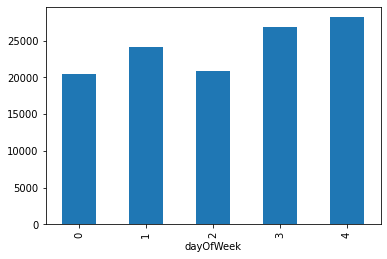

In [21]:
data_sample.groupby('dayOfWeek')["BlueCars_returned_sum"].sum().plot.bar()
plt.show()

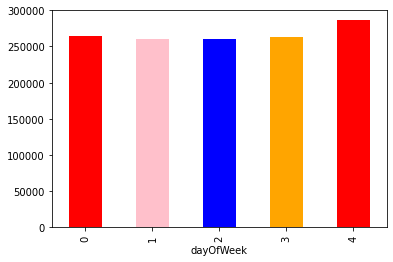

In [57]:
# Creating a Bar chart for Blue Cars returned based on weekday daytype

colors = ["red","pink","blue","orange"]
weekday.groupby('dayOfWeek')["BlueCars_returned_sum"].sum().plot.bar(color=colors)
plt.show()

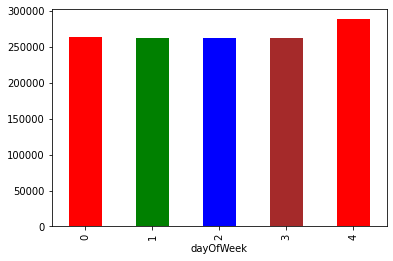

In [58]:
colors = ["red","green","blue","brown"]
weekday.groupby('dayOfWeek')["BlueCars_taken_sum"].sum().plot.bar(color=colors)
plt.show()

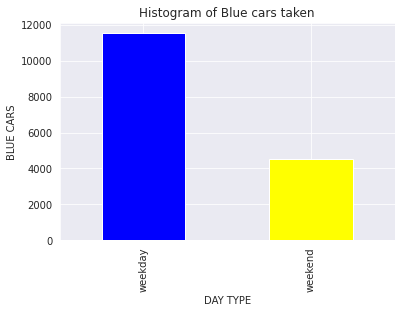

In [ ]:
# A comparison between the blue cars on weekdays vs weekend
colors = ["blue","yellow"]
data.groupby('day_type')["day_type"].count().plot(kind="bar",color=colors)
plt.xlabel('DAY TYPE')
plt.ylabel('BLUE CARS')
plt.title('Histogram of Blue cars taken') 
plt.show()

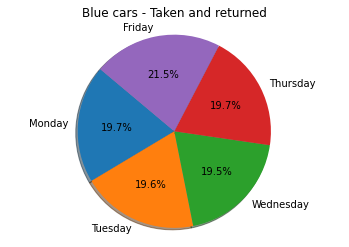

In [50]:
# Creating a Pie chart for the weekdays columns Blue cars taken and blu cars returned

label = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
week = weekday.groupby("dayOfWeek").BlueCars_taken_sum.sum()
week
# Plotting  pie chart

plt.pie(week, labels = label, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Blue cars - Taken and returned')
plt.show()

Bivariate Analysis

In [23]:
# Calculating the pearson coefficient
pearson_coeff = data["BlueCars_taken_sum"].corr(data["BlueCars_returned_sum"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = data["BlueCars_taken_sum"].corr(data["BlueCars_returned_sum"]) 
print(coeff)

0.9986597051672199
0.9986597051672199


In [52]:
# Finding the correlation between the blue cars columns during the weekday

weekday["BlueCars_taken_sum"].corr(weekday["BlueCars_returned_sum"])

0.9987802776217566

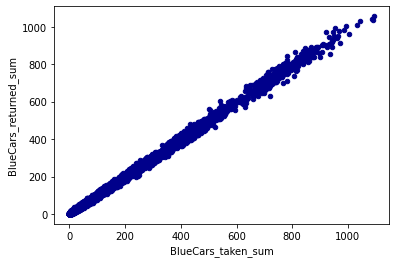

In [53]:
columms = ["BlueCars_taken_sum","BlueCars_returned_sum"]
weekday.plot.scatter(x='BlueCars_taken_sum',y='BlueCars_returned_sum',c='DarkBlue')

In [59]:
# Looking for the correlation between the Blue cars and the free slots for the sample selected
# Slots_freed_sum
weekday["BlueCars_taken_sum"].corr(data_sample["Slots_freed_sum"])

0.9384758297052301

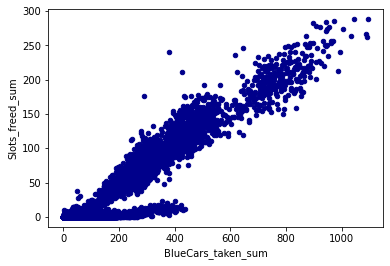

In [54]:
#Scatter plot between the blue cars and slots
columms = ["BlueCars_taken_sum","Slots_freed_sum"]
weekday.plot.scatter(x='BlueCars_taken_sum',y='Slots_freed_sum',c='DarkBlue')

Line Charts

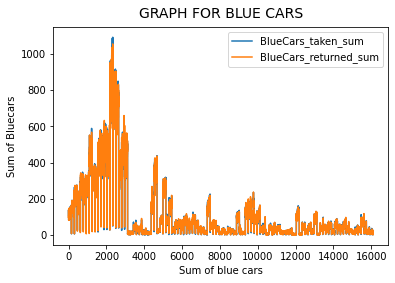

In [28]:
from matplotlib import pyplot as plt
weekday[["BlueCars_taken_sum","BlueCars_returned_sum"]].plot()

# Giving a title to our line graph
plt.title("GRAPH FOR BLUE CARS", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Sum of Bluecars')

# Labelling the x-axis
plt.xlabel('Sum of blue cars')

# Displaying our graph
plt.show()

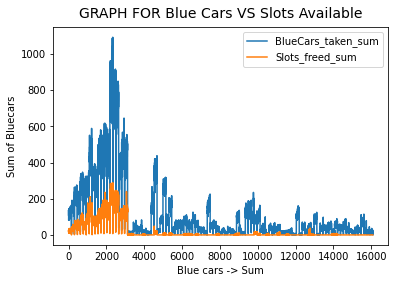

In [27]:
# Line graph for Blue cars and slots available
weekday[["BlueCars_taken_sum","Slots_freed_sum"]].plot()

# Giving a title to our line graph
plt.title("GRAPH FOR Blue Cars VS Slots Available", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Sum of Bluecars')

# Labelling the x-axis
plt.xlabel('Blue cars -> Sum')

# Displaying our graph
plt.show()

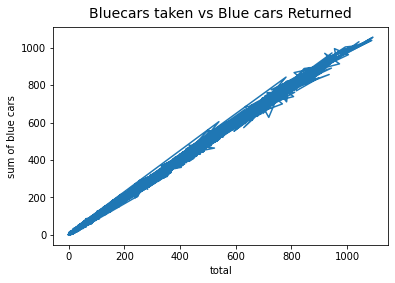

In [29]:
# Line Plot for Blue cars returned

# Plotting our line graph

week = weekday["BlueCars_taken_sum"]

week2 = weekday["BlueCars_returned_sum"]
# colors = ["green","brown"]
plt.plot(week,week2)

# Giving a title to our line graph
plt.title("Bluecars taken vs Blue cars Returned", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('sum of blue cars')

# Labelling the x-axis
plt.xlabel('total')

# Displaying our graph
plt.show()

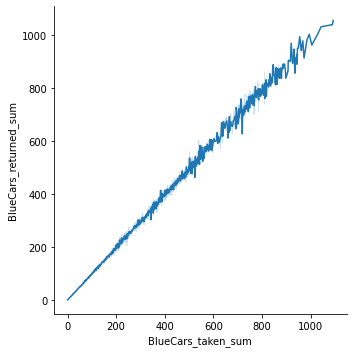

In [30]:
# BlueCars_taken_sum
columns = ["BlueCars_taken_sum","BlueCars_returned_sum"]
sns.relplot(x="BlueCars_taken_sum", y="BlueCars_returned_sum", kind="line", data=weekday)

Heat Mapp

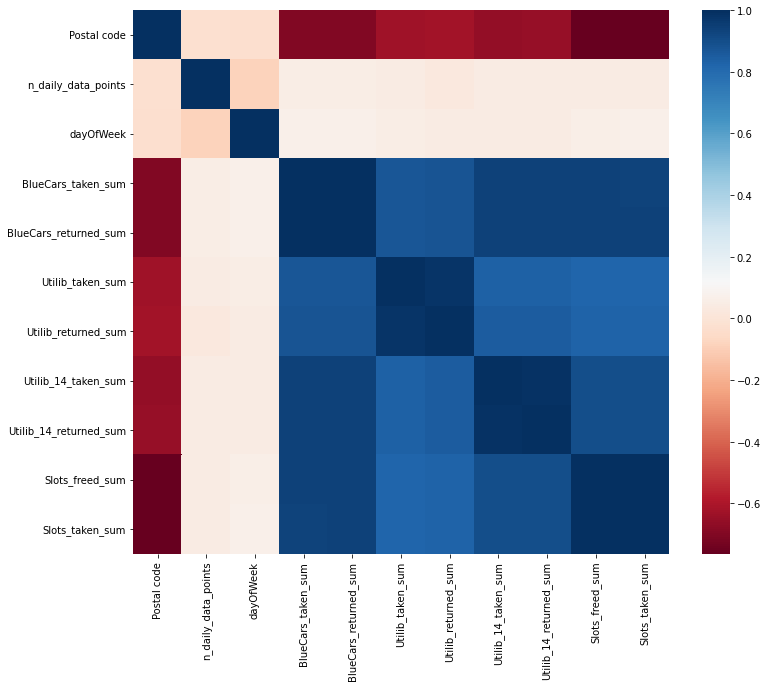

In [55]:
# Creating a heat map for the column

data_blue = weekday["BlueCars_returned_sum"]
plt.figure(figsize=(12, 10))
sns.heatmap(data_sample.corr(), cmap="RdBu")

# Multivariate Analysis

In [ ]:
# Creating a pairplot But 
# i have to identify numeric values
data.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

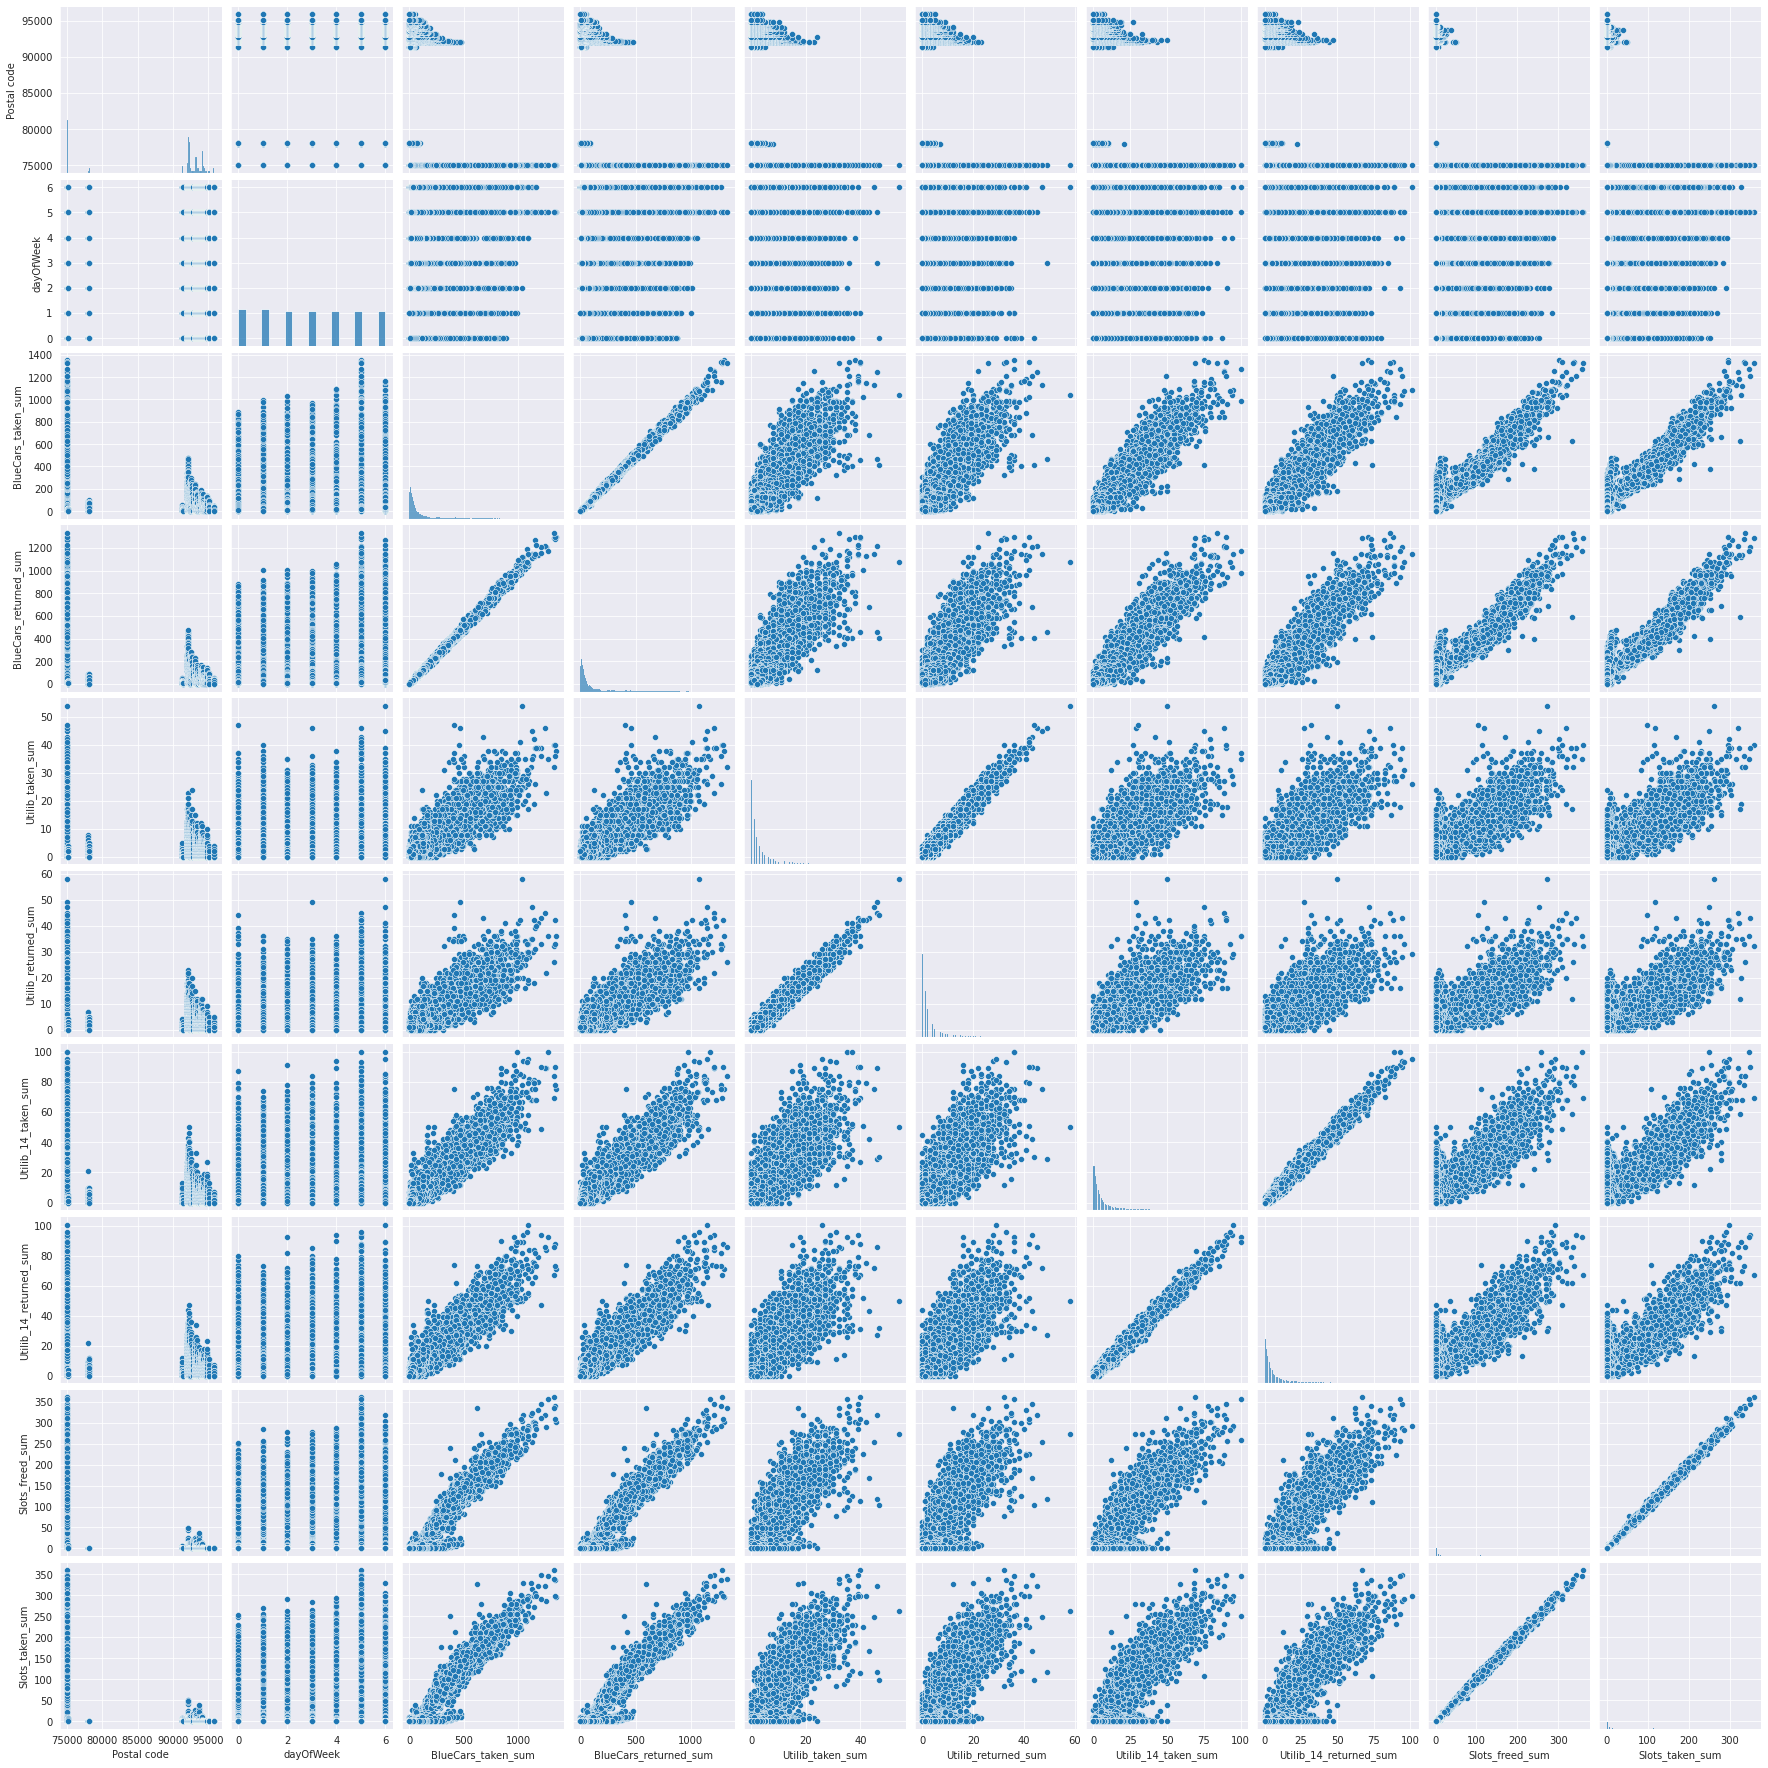

In [ ]:
# Creating a pairplot
Data = data[["Postal code","dayOfWeek","BlueCars_taken_sum","BlueCars_returned_sum","Utilib_taken_sum","Utilib_returned_sum",
           "Utilib_14_taken_sum","Utilib_14_returned_sum","Slots_freed_sum","Slots_taken_sum"]]
sns.pairplot(Data)

In [ ]:
# Describing the Numeric values
Data.describe()

,Postal code,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


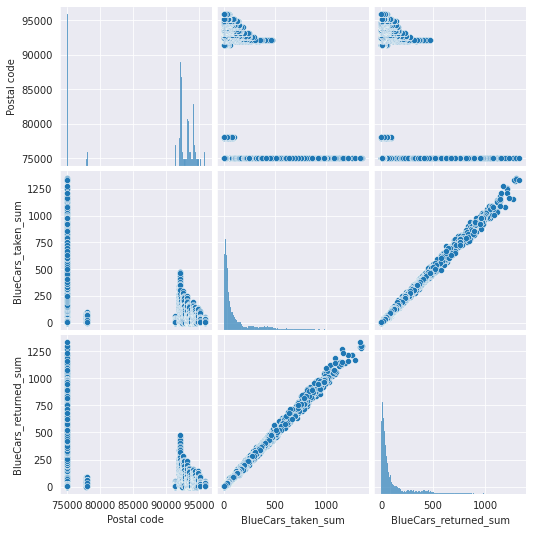

In [ ]:
# Creating a pair plot for postal address and Blue cars column
pair = data[["Postal code","BlueCars_taken_sum","BlueCars_returned_sum"]]

sns.pairplot(pair)

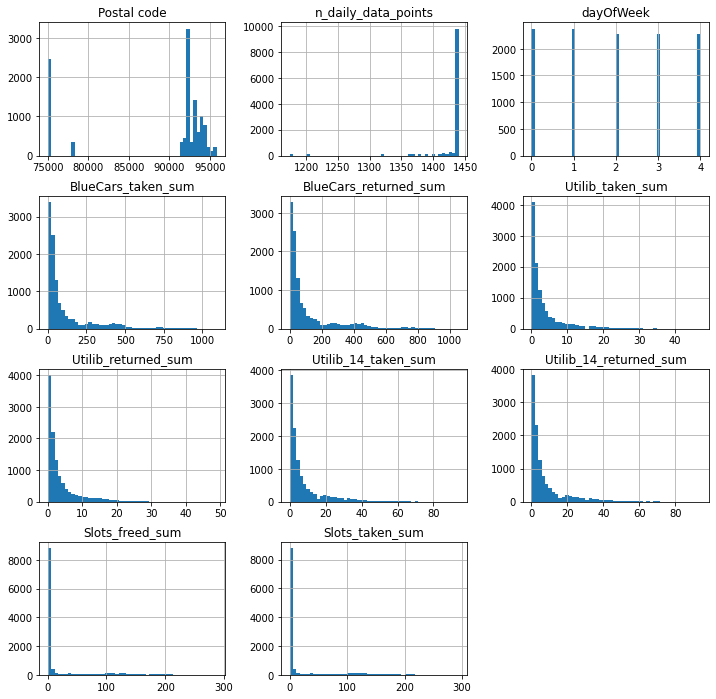

In [56]:
# Checking the relationship of columns using histogram illustrations
weekday.hist(bins=50, figsize=(12,12));


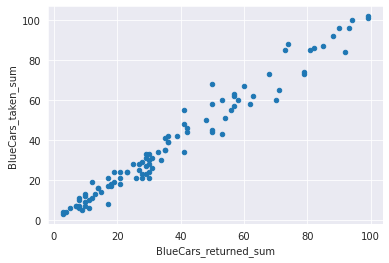

In [ ]:
# Creating a scatter plot
columns = ["BlueCars_returned_sum","BlueCars_taken_sum"]
data[data['BlueCars_returned_sum'] < 100].sample(100).plot.scatter(x='BlueCars_returned_sum', y='BlueCars_taken_sum')


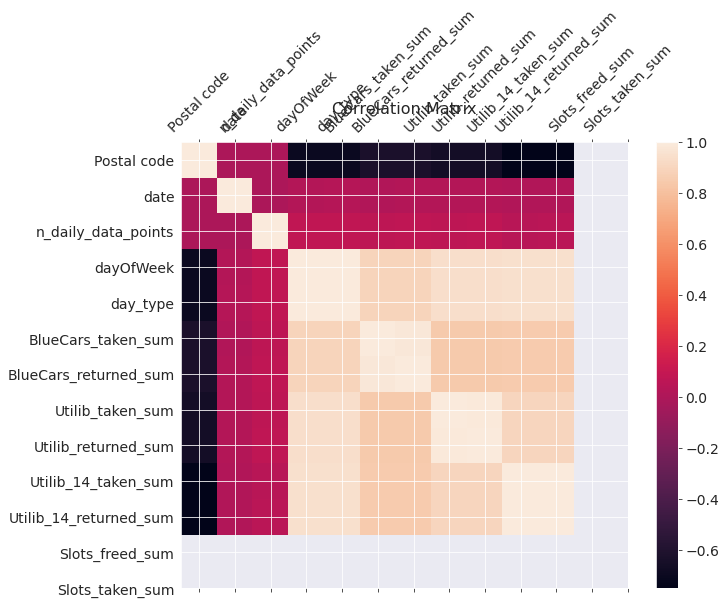

In [ ]:
# Creating a correlation matrix for the dataframe
%matplotlib inline

f = plt.figure(figsize=(10,8))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Performing linear regression

In [ ]:
# Splitting the dataset into X and y
col = data.drop(['date', 'Postal code'], axis =1)
post_conv = data['Postal code'].astype('int')

# Encoding categorical columns; day of week and day_type
X1 =pd.get_dummies(col)

# Standardizing 
sc = StandardScaler()
X = sc.fit_transform(X1)


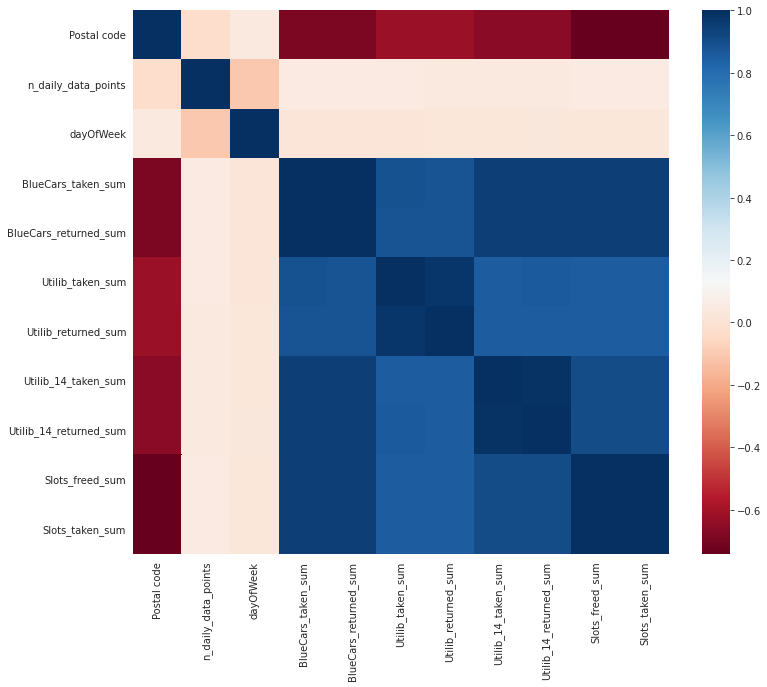

In [ ]:
# Creating a Heat map
data_blue = data_sample["BlueCars_taken_sum"]
plt.figure(figsize=(12, 10))
sns.heatmap(data_sample.corr(), cmap="RdBu")

# Sampling

In [48]:
# Creating a sample to work with for the df
# A sample of 1000 since the data size is 150072

data_sample = weekday.sample(n=1000)
print(data_sample)


       Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
13382        94110  4/18/2018  ...                0                0
10445        93150  1/12/2018  ...                4                4
14926        94410   4/2/2018  ...                0                0
3799         78150   3/1/2018  ...                0                0
2312         75015  5/23/2018  ...              170              187
...            ...        ...  ...              ...              ...
438          75003  5/21/2018  ...               61               59
5506         92160  2/19/2018  ...                0                0
1612         75011  2/22/2018  ...              118              118
6883         92260  1/23/2018  ...                0                0
10949        93230  3/26/2018  ...                0                0

[1000 rows x 13 columns]


In [ ]:
#mean for the sample chosen
print(data_sample["BlueCars_taken_sum"].mean())
print(data_sample["BlueCars_returned_sum"].mean())

120.609
120.342


# Hypothesis Testing

We will work with the sample of 1000 chosen.

# Performing a z-test

In [ ]:
#Null hypothesis: is that the sum of total number of blue cars are NOT the same in most days of the week.

#Alternative hypothesis: is that the sum of total number of blue cars are the same in most days of the week.
# formula Z = (x – μ) / (σ / √n)

# x=mean

# μ= sample mean

# σ=standard deviation

# √n= represents the square root of the numberof the samples

In [37]:
# First check the mean of the 1000 (sample) 

data = data_sample["BlueCars_taken_sum"].mean()

print("The mean for blue cars taken is", data)

The mean for blue cars taken is 120.609


In [45]:
#population mean
data.mean()

Postal code               88791.293876
n_daily_data_points        1431.330619
dayOfWeek                     2.969599
BlueCars_taken_sum          125.926951
BlueCars_returned_sum       125.912714
Utilib_taken_sum              3.698290
Utilib_returned_sum           3.699099
Utilib_14_taken_sum           8.600560
Utilib_14_returned_sum        8.599192
Slots_freed_sum              22.629033
Slots_taken_sum              22.629282
dtype: float64

In [38]:
# Then will find the standard deviation std()

datas = data_sample["BlueCars_taken_sum"].std()

print("The standard deviation for blue cars taken is", datas)

The standard deviation for blue cars taken is 180.7525147559243


In [39]:
data_sample.mean()

Postal code               88860.501
n_daily_data_points        1428.698
dayOfWeek                     2.035
BlueCars_taken_sum          120.609
BlueCars_returned_sum       120.342
Utilib_taken_sum              3.565
Utilib_returned_sum           3.558
Utilib_14_taken_sum           8.131
Utilib_14_returned_sum        8.197
Slots_freed_sum              21.536
Slots_taken_sum              21.490
dtype: float64

In [ ]:
# Initial dataFrame size
data.size

209105

In [ ]:
# size after working with a sample and category
data_sample.size

13000

In [46]:
# calculating the Z value
# i chose z score since my sample is more than 30

signal=(125-120) # x - u
#√1000=31.62277660
noise=(datas/31.62) # std / sample(1000)
z_score=(signal/noise)
print('Z score is ',z_score)


Z score is  0.8746766273956814


In [49]:
#confidence interval
import math
sample_mean = data_sample['BlueCars_taken_sum'].mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = data['BlueCars_taken_sum'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(101.48909426065745, 143.73690573934255)


# P-Value

In [43]:
# significance level stands at 0.05
# will subtract 1 from the z_score
# stats and Norm imported

Pvalue = 1 - stats.norm.cdf(z_score)
Pvalue

0.19087494043182185

Since the pvalue is higher than the significance level, we will not reject the null hypothesis

In [42]:
Hypoth_alternative = data_sample.groupby('dayOfWeek').BlueCars_taken_sum.sum()
Hypoth_alternative


dayOfWeek
0    20441
1    24251
2    20752
3    26833
4    28332
Name: BlueCars_taken_sum, dtype: int64